# Logistic Reggression from scratch

## Case Study - Admission grant to students using two examination's marks

###  Necessary imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt

### Load local data into the program

In [12]:
def load_data(path, header):
    marks_df = pd.read_csv(path, header=header)
    return marks_df

# loading...
data = load_data("marks.txt", None)

### Data Pre-processing

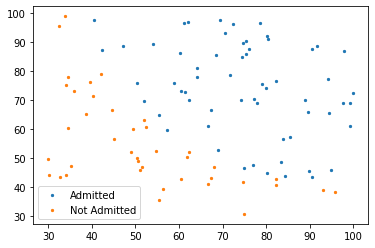

In [14]:
X = data.iloc[:,0:2]
y = data.iloc[:, 2]

admitted = data.loc[y==1]
not_admitted = data.loc[y==0]

plt.scatter(admitted.iloc[:,0], admitted.iloc[:,1], s=5, label="Admitted")
plt.scatter(not_admitted.iloc[:,0], not_admitted.iloc[:,1], s=5, label="Not Admitted")
plt.legend()
plt.show()

In [5]:
m = X.shape[0]

X = np.c_[np.ones((m,1)), X]

#y = y[:, np.newaxis]     #transpose
y = np.array(y).reshape((m,1))
#y = np.transpose(y)

theta = np.zeros((X.shape[1], 1))
X.shape

(100, 3)

In [6]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    t = np.array(1 / (1 + np.exp(-x)),dtype = np.float128)
    return t

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

In [7]:
def _h(theta, X):
    #print(theta.shape)
    z = np.dot(X,theta)       # theta-> 3 x 1; X-> m x 3
    h = sigmoid(z)            # h -> m x 1
    
    return h

def cost_function(theta, X, y):
    # Computes the cost function for all the training samples
    
    z = np.dot(X,theta)       # theta-> 3 x 1; X-> m x 3
    h = 1/(1+np.exp(-z))      # h -> m x 1
    
    m = X.shape[0]
    cost = np.multiply(-y,np.log(h))- np.multiply((1-y),np.log(1-h))
    
    J = (1/m)*np.sum(cost)
    
    return J
    
    #m = x.shape[0]
#     total_cost = -(1 / m) * np.sum(
#         y * np.log(probability(theta, x)) + (1 - y) * np.log(
#             1 - probability(theta, x)))
#     return total_cost

def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

In [8]:
def gradient_descent(theta, X, y, alpha):
    m = X.shape[0]
    
    for i in range(900):
        h = _h(theta, X)     #update hypothesis every time when theta changes
        #print(theta.shape)
        theta = theta - (alpha/m)*(np.sum(((h-y) * X), axis = 0).reshape(theta.shape[0], 1))
        
    return theta

In [9]:
def fit(x, y, theta):
    opt_weights = opt.fmin_tnc(func=cost_function, x0=theta,fprime=gradient, args=(x, y.flatten()))
    
    return opt_weights[0]
y.shape

(100, 1)

In [10]:
theta = np.zeros((X.shape[1], 1))
parameters=gradient_descent(theta, X,y, 0.5084)
#parameters = fit(X, y, theta)
parameters


array([[-34.94820331],
       [ 29.05076553],
       [  4.76223581]], dtype=float128)

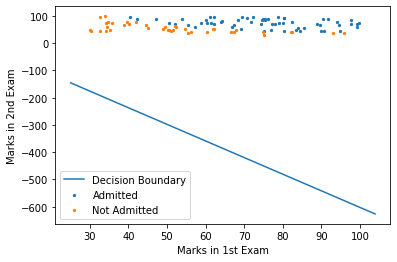

In [11]:
h = _h(parameters, X)

x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
#y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]
y_values = - (parameters[0][0] + np.dot(parameters[1][0], x_values)) / parameters[2][0]


plt.scatter(admitted.iloc[:,0], admitted.iloc[:,1], s=5, label="Admitted")
plt.scatter(not_admitted.iloc[:,0], not_admitted.iloc[:,1], s=5, label="Not Admitted")
plt.legend()

plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()